Importing the Python Libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Mount Google Drive to Read the data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


Define the Path for Train and Test Images

In [3]:
data_dir_train = pathlib.Path('/content/gdrive/My Drive/Train')
data_dir_test = pathlib.Path('/content/gdrive/My Drive/Test')

Count the Number of Images in Train and Test Directory


In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


Define Parameters for Loader

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Creating Train Dataset


In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


Creating Validation (Test) Dataset


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


List out all the classes of skin cancer and store them in a list

In [8]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Visualize the data

In [9]:
import matplotlib.pyplot as plt

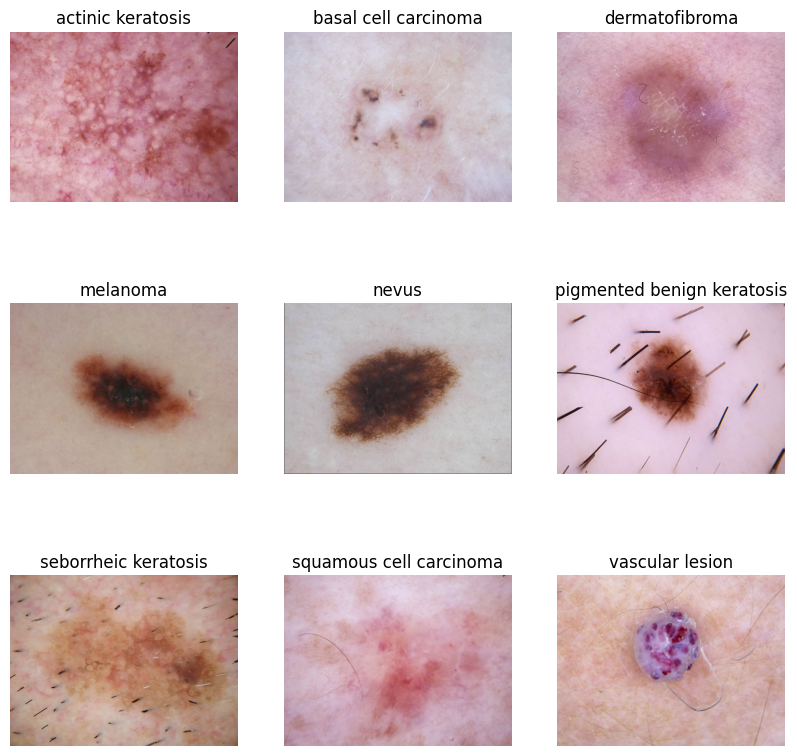

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  image = plt.imread(
      str(list(data_dir_train.glob(f'{class_names[i]}/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
  plt.axis('off')

DataCache and DataPrefetch


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Create the CNN Model - to detect 9 classes present in the dataset. normalize pixel values between (0,1). The RGB channel range [0, 255]

In [11]:
from keras.layers import Conv2D
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import MaxPool2D, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [12]:
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, kernel_size=(3, 3),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(16, kernel_size=(7, 7),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(11,11),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))

Compile the model - Choose an appropirate optimiser and loss function for model training

In [13]:
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

View the summary of all layers

   

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                   

Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
169/169 [==============================] - 233s 313ms/step - loss: 2.1898 - accuracy: 0.1419 - val_loss: 2.1899 - val_accuracy: 0.1403
Epoch 2/20
169/169 [==============================] - 9s 52ms/step - loss: 2.1558 - accuracy: 0.1641 - val_loss: 2.1890 - val_accuracy: 0.1403
Epoch 3/20
169/169 [==============================] - 9s 53ms/step - loss: 1.9844 - accuracy: 0.2244 - val_loss: 1.8979 - val_accuracy: 0.2576
Epoch 4/20
169/169 [==============================] - 9s 53ms/step - loss: 1.7159 - accuracy: 0.3409 - val_loss: 1.7259 - val_accuracy: 0.3356
Epoch 5/20
169/169 [==============================] - 9s 53ms/step - loss: 1.5840 - accuracy: 0.3839 - val_loss: 1.4986 - val_accuracy: 0.4157
Epoch 6/20
169/169 [==============================] - 9s 53ms/step - loss: 1.5214 - accuracy: 0.4041 - val_loss: 1.5836 - val_accuracy: 0.3994
Epoch 7/20
169/169 [==============================] - 9s 54ms/step - loss: 1.4859 - accuracy: 0.4171 - val_loss: 1.4309 - val_accuracy: 0.4

Visualizing training results

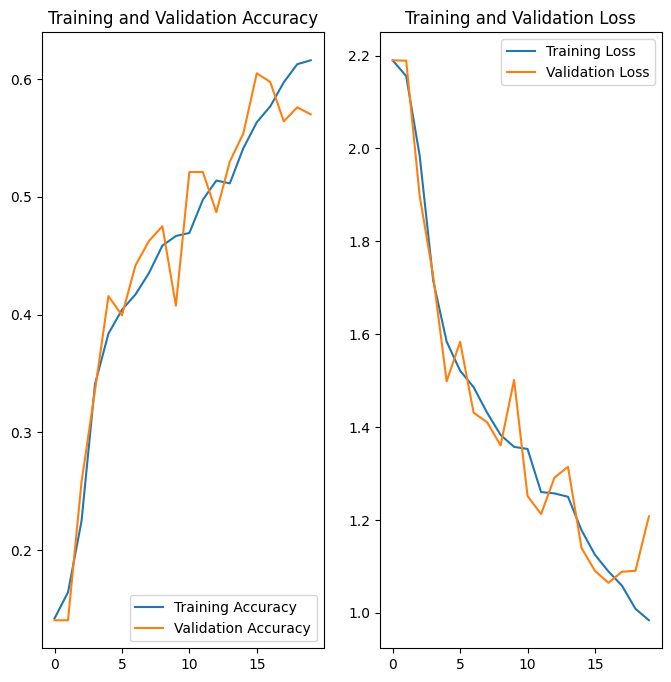

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Findings: Accuracy is very low and hence the model is underfitting


Visualize: augmentation strategy for one instance of training image.


In [17]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.1)
  ]
)


Visualization


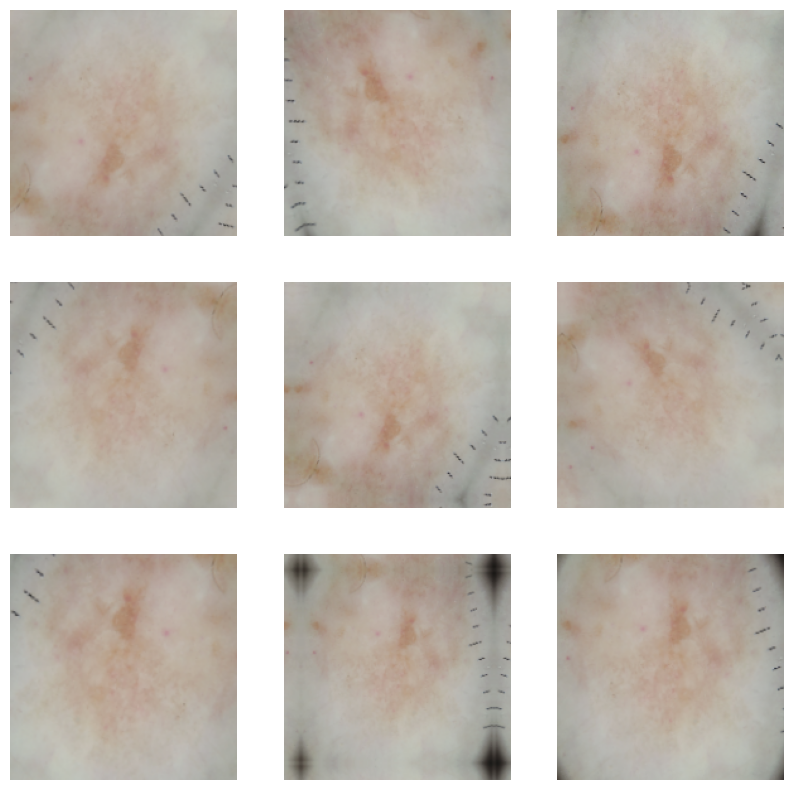

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


Create the model, compile and train the model


In [19]:
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(data_augmentation)
model.add(Conv2D(32, kernel_size=(3, 3),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(16, kernel_size=(7, 7),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(11, 11),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))


Compiling the model


In [20]:
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


Training the model


In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
              callbacks=[learn_control]
)


Epoch 1/20
169/169 [==============================] - 13s 58ms/step - loss: 2.1848 - accuracy: 0.1328 - val_loss: 2.1862 - val_accuracy: 0.1403 - lr: 0.0010
Epoch 2/20
169/169 [==============================] - 10s 57ms/step - loss: 2.1776 - accuracy: 0.1426 - val_loss: 2.1903 - val_accuracy: 0.1359 - lr: 0.0010
Epoch 3/20
169/169 [==============================] - 10s 57ms/step - loss: 2.1775 - accuracy: 0.1372 - val_loss: 2.1906 - val_accuracy: 0.1359 - lr: 0.0010
Epoch 4/20
169/169 [==============================] - 10s 57ms/step - loss: 2.1776 - accuracy: 0.1424 - val_loss: 2.1882 - val_accuracy: 0.1359 - lr: 0.0010
Epoch 5/20
169/169 [==============================] - 10s 57ms/step - loss: 2.1771 - accuracy: 0.1384 - val_loss: 2.1881 - val_accuracy: 0.1403 - lr: 0.0010
Epoch 6/20
169/169 [==============================] - ETA: 0s - loss: 2.1770 - accuracy: 0.1419
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
169/169 [==============================] -

Visualizing the results

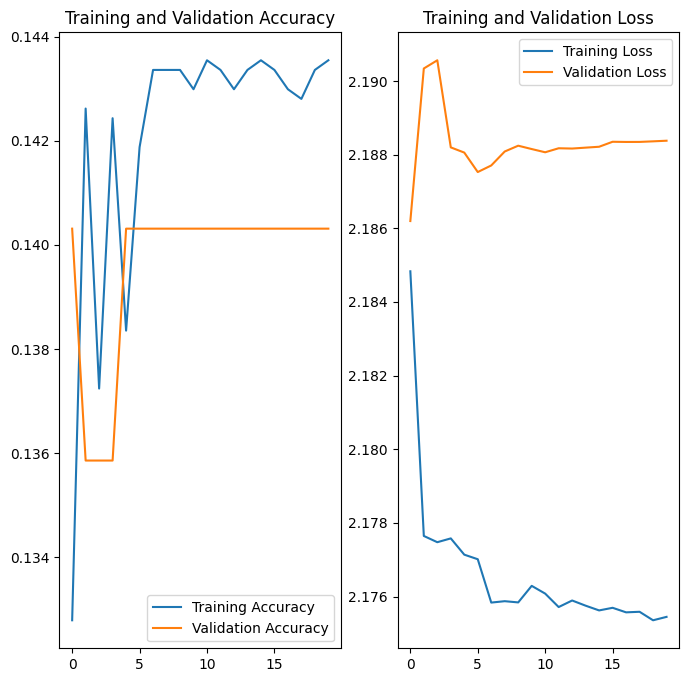

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Findings: Training and Validation are nearly equal, which is very good but the accuracy number is very low. The model may require more epochs


Find the distribution of classes in the training dataset.


In [23]:

class_diff=pd.DataFrame()
for i in range(len(class_names)):
  name= class_names[i]
  number = len(list(data_dir_train.glob(f'{class_names[i]}/*.jpg')))
  class_diff=class_diff.append({'class':name,'number':number},ignore_index=True)

class_diff


<ipython-input-23-d5ac25318fed>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  class_diff=class_diff.append({'class':name,'number':number},ignore_index=True)
<ipython-input-23-d5ac25318fed>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  class_diff=class_diff.append({'class':name,'number':number},ignore_index=True)
<ipython-input-23-d5ac25318fed>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  class_diff=class_diff.append({'class':name,'number':number},ignore_index=True)
<ipython-input-23-d5ac25318fed>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  class_diff=class_diff.append({'class':name,'number':number},ignore_index=True)
<ipy

,class,number
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<function matplotlib.pyplot.show(close=None, block=None)>

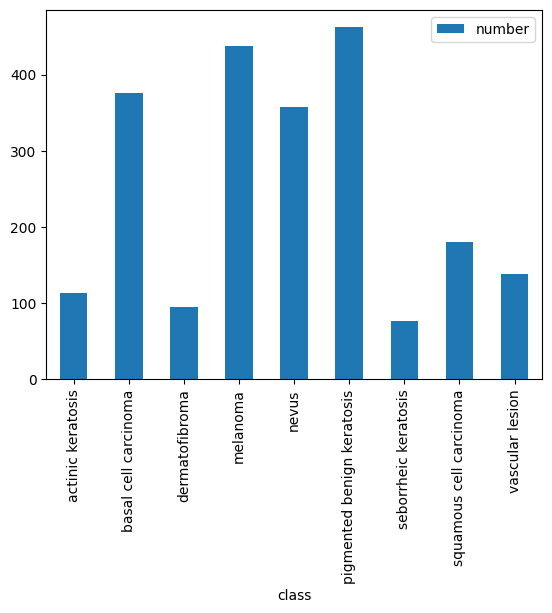

In [24]:
class_diff.plot.bar(x='class',y='number',rot=90)
plt.show


Todo: Write your findings here:
- Which class has the least number of samples? - seborrheic keratosis has 77 sampled and is least among others
- Which classes dominate the data in terms proportionate number of samples? - pigmented benign keratosis dominates with 462 samples

Todo: Rectify the class imbalance
Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

In [27]:
path_to_training_dataset="/content/gdrive/MyDrive/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + "/"+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse


Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x789C507062C0>: 100%|██████████| 500/500 [00:05<00:00, 90.57 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x789CB01E9C30>: 100%|██████████| 500/500 [00:05<00:00, 87.77 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x789C50767D00>: 100%|██████████| 500/500 [00:05<00:00, 88.64 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x789C507670A0>: 100%|██████████| 500/500 [00:18<00:00, 26.79 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x789CC424DF00>: 100%|██████████| 500/500 [00:18<00:00, 26.44 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x789CC420D930>: 100%|██████████| 500/500 [00:06<00:00, 82.37 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x789CB02EBF40>: 100%|██████████| 500/500 [00:09<00:00, 53.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x789CB04B15D0>: 100%|██████████| 500/500 [00:05<00:00, 84.09 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x789CB0233880>: 100%|██████████| 500/500 [00:05<00:00, 87.29 Samples/s]


See the distribution of augmented data after adding new images to the original training data.

In [28]:
from glob import glob

path_list = list(glob(os.path.join(data_dir_train, '*','output', '*.jpg')))
path_list



['/content/gdrive/My Drive/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027960.jpg_33555371-3cd0-4517-a84f-d5788870a27d.jpg',
 '/content/gdrive/My Drive/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025661.jpg_5fe990ed-c187-4289-a47c-b5ae195f583d.jpg',
 '/content/gdrive/My Drive/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025985.jpg_735d888b-82b9-4c6e-ba5f-583e626c0268.jpg',
 '/content/gdrive/My Drive/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026787.jpg_0cb27b21-6615-4a31-9b24-2d4019ac952c.jpg',
 '/content/gdrive/My Drive/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027916.jpg_8f2dd847-39a9-4f3f-9d4b-c4acfff8e655.jpg',
 '/content/gdrive/My Drive/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026291.jpg_db0b3de3-90ce-4fc6-afb1-c593b4227b7e.jpg',
 '/content/gdrive/My D

In [29]:
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list


['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [30]:
dataframe_dict_new = dict(zip(path_list, lesion_list))




In [31]:
for i in class_names:
    directory ='/content/gdrive/MyDrive/Train'
    directory_out ='/content/gdrive/MyDrive/Train'+'/'+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob(i+'/*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 1114 samples.
basal cell carcinoma has 1376 samples.
dermatofibroma has 1095 samples.
melanoma has 1438 samples.
nevus has 1357 samples.
pigmented benign keratosis has 1462 samples.
seborrheic keratosis has 1077 samples.
squamous cell carcinoma has 1181 samples.
vascular lesion has 1139 samples.


 Train the model on the new data created using Augmentor

In [32]:
batch_size = 32
img_height = 180
img_width = 180


 Create a training dataset

In [33]:
data_dir_train="/content/gdrive/MyDrive/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


Create a validation dataset


In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


Create your model including Normalization


In [35]:
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(256,kernel_size=(11,11),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_names),activation='softmax'))

Compiling the Model


In [36]:
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


View Model Summary


In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 41, 41, 128)      

Train the Model

In [38]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
              callbacks=[learn_control]
)

Epoch 1/50
281/281 [==============================] - 35s 106ms/step - loss: 1.9205 - accuracy: 0.2370 - val_loss: 1.6098 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 2/50
281/281 [==============================] - 30s 104ms/step - loss: 1.6484 - accuracy: 0.3591 - val_loss: 1.5199 - val_accuracy: 0.4223 - lr: 0.0010
Epoch 3/50
281/281 [==============================] - 30s 105ms/step - loss: 1.5417 - accuracy: 0.3967 - val_loss: 1.4323 - val_accuracy: 0.4072 - lr: 0.0010
Epoch 4/50
281/281 [==============================] - 30s 103ms/step - loss: 1.4591 - accuracy: 0.4186 - val_loss: 1.4263 - val_accuracy: 0.4277 - lr: 0.0010
Epoch 5/50
281/281 [==============================] - 30s 104ms/step - loss: 1.4343 - accuracy: 0.4397 - val_loss: 1.2655 - val_accuracy: 0.4762 - lr: 0.0010
Epoch 6/50
281/281 [==============================] - 30s 105ms/step - loss: 1.3260 - accuracy: 0.4781 - val_loss: 1.2589 - val_accuracy: 0.5038 - lr: 0.0010
Epoch 7/50
281/281 [==============================] 

Visualizing the Model Results

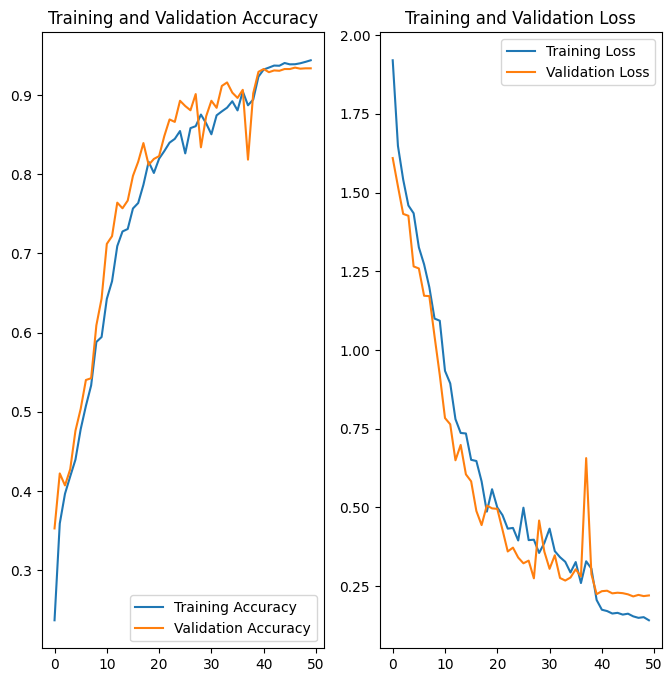

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings

1.Model Shows Significant improvement in Accuracy (87%)
2.Training and Validation accuracy and loss are almost same, which seems to be a good fit.

Testing the Model

1/1 [==============================] - 0s 444ms/step
Actual Class: basal cell carcinoma
Predictive Class: pigmented benign keratosis


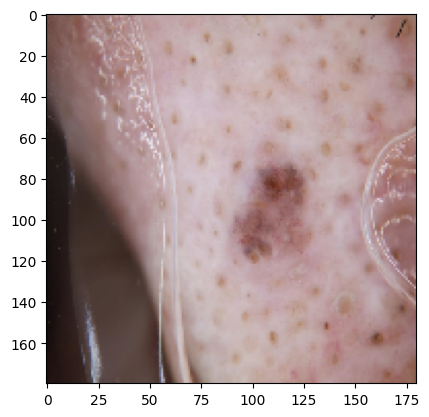

In [40]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print(f"Actual Class: {class_names[1]}" + '\n' + "Predictive Class: " + pred_class)